##Лабораторная 4

In [17]:
import pandas as pd
df = pd.read_csv("data/starbucks.csv")
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


### Бизнес-цели

1. Прогнозирование посетителей в магазине:

Цель: Разработать модель, которая будет предсказывать объем выкупленного кофе основе: цены открытия, цены закрытия, самой высокой цене, самой низкой цене
Применение:
Узнать, какие лучше цены выставлять на кофе

2. Оптимизация цен на кофе:
Цель: Определить оптимальную цену на кофе, чтобы объем их скупа был больше.


1. Прогнозирование посетителей в магазине

In [18]:
# Устанавливаем случайное состояние
random_state = 28

# Рассчитываем среднее значение объема
average_count = df['Volume'].mean()
print(f"Среднее значение поля 'Volume: {average_count}")

# Создаем новую переменную, указывающую, превышает ли объемная продажа среднюю
df["above_average_volume"] = (df["Volume"] > average_count).astype(int)

# Рассчитываем волатильность (разницу между максимальной и минимальной объемная продажаю)
df["volume_volatility"] = df["Volume"].max() - df["Volume"].min()

# Выводим первые строки измененной таблицы для проверки
print(df.head())

Среднее значение поля 'Volume: 14704589.99726232
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1992-06-26  0.328125  0.347656  0.320313  0.335938   0.260703  224358400   
1  1992-06-29  0.339844  0.367188  0.332031  0.359375   0.278891   58732800   
2  1992-06-30  0.367188  0.371094  0.343750  0.347656   0.269797   34777600   
3  1992-07-01  0.351563  0.359375  0.339844  0.355469   0.275860   18316800   
4  1992-07-02  0.359375  0.359375  0.347656  0.355469   0.275860   13996800   

   above_average_volume  volume_volatility  
0                     1          584004800  
1                     1          584004800  
2                     1          584004800  
3                     1          584004800  
4                     0          584004800  


2. Оптимизация параметров магазина:

In [19]:
# Устанавливаем случайное состояние
random_state = 42

# Рассчитываем среднюю объемную продажу для каждого значения каждого признака
for column in ["Open", "Close", "High", "Low"]:
    print(f"Средняя объемная продажа для '{column}':")
    print(df.groupby(column)["Volume"].mean())
    print()


print("Средняя объемная продажа для комбинации 'Open' и 'Close':")
print(df.groupby(["Open", "Close"])["Volume"].mean())
print()


print("Средняя объемная продажа для комбинации 'High' и 'Low':")
print(df.groupby(["High", "Low"])["Volume"].mean())
print()


Средняя объемная продажа для 'Open':
Open
0.328125      224358400.0
0.339844       58732800.0
0.351563        9331200.0
0.355469       13081600.0
0.359375       12518400.0
                 ...     
122.559998     11747000.0
122.930000      6618400.0
124.550003      7934200.0
125.739998      4827500.0
126.080002      6110900.0
Name: Volume, Length: 5300, dtype: float64

Средняя объемная продажа для 'Close':
Close
0.335938      224358400.0
0.347656       25139200.0
0.355469       12182400.0
0.359375       31328000.0
0.363281       11040000.0
                 ...     
122.410004     11747000.0
122.629997      7172300.0
125.970001      7934200.0
126.029999      6110900.0
126.059998      4827500.0
Name: Volume, Length: 5440, dtype: float64

Средняя объемная продажа для 'High':
High
0.347656      2.243584e+08
0.355469      1.063893e+07
0.359375      1.207893e+07
0.367188      3.488640e+07
0.371094      2.038720e+07
                  ...     
123.330002    1.174700e+07
123.470001    6.618400e

### Выбор ориентира:
1. Прогнозирование стоимости акций взносов:
Ориентир:

R² (коэффициент детерминации): 0.75 - 0.85

MAE (средняя абсолютная ошибка): 1000000 - 1500000 продаж

RMSE (среднеквадратичная ошибка): 1200000 - 1600000 продаж

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Разделяем данные на признаки (X) и целевую переменную (y)

X = df.drop(columns=["Volume", "Date"], axis=1)

y = df["Volume"]

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оцениваем качество модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Проверяем, достигнуты ли ориентиры
if r2 >= 0.75 and mae <= 1500000 and rmse <= 1700000:
    print("Ориентиры для прогнозирования достигнуты!")
else:
    print("Ориентиры для прогнозирования не достигнуты.")


columns_to_group = [
    "Open",
    "High",
    "Close", "Low"
]

# Рассчитываем среднюю объемная продажа для каждого значения каждого признака
for column in columns_to_group:
    print(f"Средняя объемная продажа '{column}':")
    print(df.groupby(column)["Volume"].mean())
    print()

# Рассчитываем среднюю объемная продажа для комбинаций признаков

print(
    "Средняя посещаемость взносов для комбинации 'Open' и 'Close':"
)
print(df.groupby(["Open", "Close"])["Volume"].mean())
print()

print(
    "Средняя посещаемость взносов для комбинации 'High' и 'Low':"
)
print(df.groupby(["High", "Low"])["Volume"].mean())
print()

MAE: 3991467.1377542643
MSE: 46938455671077.555
RMSE: 6851164.548533158
R²: 0.5289490019636116
Ориентиры для прогнозирования не достигнуты.
Средняя объемная продажа 'Open':
Open
0.328125      224358400.0
0.339844       58732800.0
0.351563        9331200.0
0.355469       13081600.0
0.359375       12518400.0
                 ...     
122.559998     11747000.0
122.930000      6618400.0
124.550003      7934200.0
125.739998      4827500.0
126.080002      6110900.0
Name: Volume, Length: 5300, dtype: float64

Средняя объемная продажа 'High':
High
0.347656      2.243584e+08
0.355469      1.063893e+07
0.359375      1.207893e+07
0.367188      3.488640e+07
0.371094      2.038720e+07
                  ...     
123.330002    1.174700e+07
123.470001    6.618400e+06
126.099998    4.827500e+06
126.160004    6.110900e+06
126.320000    7.934200e+06
Name: Volume, Length: 5245, dtype: float64

Средняя объемная продажа 'Close':
Close
0.335938      224358400.0
0.347656       25139200.0
0.355469       121824

c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Анализ применимости алгоритмов обучения с учителем для решения поставленных задач:
1. Прогнозирование посещаемости магазинов:
Задача: Регрессия

Свойства алгоритмов:

Линейная регрессия:
Применимость: Хорошо подходит для задач, где зависимость между признаками и целевой переменной линейна.
Преимущества: Проста в реализации, интерпретируема.
Недостатки: Может плохо работать, если зависимость нелинейна.

Деревья решений (регрессия):
Применимость: Подходит для задач с нелинейными зависимостями.
Преимущества: Может обрабатывать категориальные признаки, не требует масштабирования данных.
Недостатки: Подвержены переобучению, могут давать нестабильные результаты.

Случайный лес (регрессия):
Применимость: Хорошо подходит для задач с нелинейными зависимостями и большим количеством признаков.
Преимущества: Устойчив к переобучению, может обрабатывать категориальные признаки.
Недостатки: Менее интерпретируем, чем линейная регрессия.

Градиентный бустинг (регрессия):
Применимость: Подходит для задач с нелинейными зависимостями и сложными взаимосвязями между признаками.
Преимущества: Может достигать высокой точности, устойчив к переобучению.
Недостатки: Сложнее в настройке, чем случайный лес, менее интерпретируем.

Нейронные сети (регрессия):
Применимость: Подходит для задач с очень сложными зависимостями и большим количеством данных.
Преимущества: Может моделировать очень сложные зависимости.
Недостатки: Требует большого количества данных, сложнее в настройке и интерпретации.

Вывод:

Линейная регрессия: Может быть хорошим выбором для начала, особенно если зависимость между признаками и целевой переменной линейна.

Деревья решений и случайный лес: Подходят для задач с нелинейными зависимостями.

Градиентный бустинг: Может давать более высокую точность, чем случайный лес, но требует больше времени на настройку.

Нейронные сети: Могут быть излишними для этой задачи, если данных недостаточно много.

2. Оптимизация тарифной сетки:
Задача: Классификация (группировка клиентов по группам риска)

Свойства алгоритмов:

Логистическая регрессия:
Применимость: Хорошо подходит для задач бинарной классификации, где зависимость между признаками и целевой переменной линейна.
Преимущества: Проста в реализации, интерпретируема.
Недостатки: Может плохо работать, если зависимость нелинейна.

Деревья решений (классификация):
Применимость: Подходит для задач с нелинейными зависимостями.
Преимущества: Может обрабатывать категориальные признаки, не требует масштабирования данных.
Недостатки: Подвержены переобучению, могут давать нестабильные результаты.

Случайный лес (классификация):
Применимость: Хорошо подходит для задач с нелинейными зависимостями и большим количеством признаков.
Преимущества: Устойчив к переобучению, может обрабатывать категориальные признаки.
Недостатки: Менее интерпретируем, чем линейная регрессия.

Градиентный бустинг (классификация):
Применимость: Подходит для задач с нелинейными зависимостями и сложными взаимосвязями между признаками.
Преимущества: Может достигать высокой точности, устойчив к переобучению.
Недостатки: Сложнее в настройке, чем случайный лес, менее интерпретируем.

Нейронные сети (классификация):
Применимость: Подходит для задач с очень сложными зависимостями и большим количеством данных.
Преимущества: Может моделировать очень сложные зависимости.
Недостатки: Требует большого количества данных, сложнее в настройке и интерпретации.

Вывод:

Логистическая регрессия: Может быть хорошим выбором для начала, особенно если зависимость между признаками и целевой переменной линейна.

Деревья решений и случайный лес: Подходят для задач с нелинейными зависимостями.

Градиентный бустинг: Может давать более высокую точность, чем случайный лес, но требует больше времени на настройку.

Нейронные сети: Могут быть излишними для этой задачи, если данных недостаточно много.


1. Прогнозирование стоимости акций:
Выбранные модели:

Линейная регрессия

Случайный лес (регрессия)

Градиентный бустинг (регрессия)

2. Оптимизация тарифной сетки:
Выбранные модели:

Логистическая регрессия

Случайный лес (классификация)

Градиентный бустинг (классификация)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df.drop(columns = ["Volume", "Date"], axis=1)
y_reg = df["Volume"]

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Стандартизируем признаки для задачи регрессии
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred_reg = model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df.drop(columns=["Volume", "Date"], axis=1)
y_class = (df["Volume"] > df["Volume"].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Стандартизируем признаки для задачи классификации
scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, model in models_class.items():
    model.fit(X_train_class, y_train_class)
    y_pred_class = model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
MAE: 3991467.1377542643
MSE: 46938455671077.555
RMSE: 6851164.548533158
R²: 0.5289490019636116



c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
MAE: 3632387.72405058
MSE: 36255672119329.99
RMSE: 6021268.314842812
R²: 0.6361561050076534



c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Gradient Boosting Regression
MAE: 3762986.930251514
MSE: 32821664355184.965
RMSE: 5729019.493350059
R²: 0.6706180991537869

Результаты для задачи классификации:
Model: Logistic Regression
Accuracy: 1.0

Model: Random Forest Classification
Accuracy: 1.0

Model: Gradient Boosting Classification
Accuracy: 1.0



1. Прогнозирование стоимости акций:
Конвейер для задачи регрессии:

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

numerical_cols = ["Open", "Close", "High", "Low"]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df["Volume"]

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train_reg, y_train_reg)
    y_pred_reg = pipeline.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
MAE: 5864823.098654955
MSE: 79729784253194.64
RMSE: 8929153.613484016
R²: 0.19987153584955009



c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
MAE: 4775882.923204809
MSE: 53290061861042.07
RMSE: 7300004.237056446
R²: 0.4652074409739847

Model: Gradient Boosting Regression
MAE: 5397945.863176441
MSE: 62387989562365.266
RMSE: 7898606.811480444
R²: 0.37390516307625066



c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2. Оптимизация характеристик магазина:
Конвейер для задачи классификации:

In [23]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score


numerical_cols = ["Open", "Close", "High", "Low"]
# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df["Volume"] > df["Volume"].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train_class, y_train_class)
    y_pred_class = pipeline.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи классификации:
Model: Logistic Regression
Accuracy: 0.6648009950248757

Model: Random Forest Classification
Accuracy: 0.7568407960199005

Model: Gradient Boosting Classification
Accuracy: 0.7437810945273632



1. Прогнозирование посещения:

Настройка гиперпараметров для задачи регрессии:

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Определяем категориальные и числовые столбцы

numerical_cols = ["Open", "Close", "High", "Low"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи регрессии
models_reg = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest Regression": (RandomForestRegressor(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Regression": (GradientBoostingRegressor(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Volume']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, (model, params) in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
Best Parameters: {}
MAE: 5864823.098654955
MSE: 79729784253194.64
RMSE: 8929153.613484016
R²: 0.19987153584955009



c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
Best Parameters: {'model__max_depth': None, 'model__n_estimators': 200}
MAE: 4765190.037919035
MSE: 52229952422553.555
RMSE: 7227029.2944302885
R²: 0.4758461720930298

Model: Gradient Boosting Regression
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
MAE: 4991448.210803198
MSE: 55277620586398.51
RMSE: 7434892.10321162
R²: 0.4452612900440134



c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2. Оптимизация характеристик:

Настройка гиперпараметров для задачи классификации:

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Определяем категориальные и числовые столбцы

numerical_cols = ["Open", "Close", "High", "Low"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи классификации
models_class = {
    "Logistic Regression": (LogisticRegression(), {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    }),
    "Random Forest Classification": (RandomForestClassifier(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Classification": (GradientBoostingClassifier(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Volume'] > df['Volume'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, (model, params) in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_class, y_train_class)
    best_model = grid_search.best_estimator_
    y_pred_class = best_model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи классификации:
Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__solver': 'liblinear'}
Accuracy: 0.6865671641791045

Model: Random Forest Classification
Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 100}
Accuracy: 0.7562189054726368

Model: Gradient Boosting Classification
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Accuracy: 0.7475124378109452



1. Прогнозирование посещаемости::
Задача: Регрессия

Выбор метрик:

MAE (Mean Absolute Error): Средняя абсолютная ошибка. Показывает среднее отклонение предсказанных значений от фактических. Эта метрика легко интерпретируется, так как она измеряется в тех же единицах, что и целевая переменная 

MSE (Mean Squared Error): Среднеквадратичная ошибка. Показывает среднее квадратичное отклонение предсказанных значений от фактических. Эта метрика чувствительна к выбросам, так как ошибки возводятся в квадрат.

RMSE (Root Mean Squared Error): Квадратный корень из среднеквадратичной ошибки. Показывает среднее отклонение предсказанных значений от фактических в тех же единицах, что и целевая переменная. Эта метрика также чувствительна к выбросам, но легче интерпретируется, чем MSE.

R² (R-squared): Коэффициент детерминации. Показывает, какую долю дисперсии целевой переменной объясняет модель. Значение R² близкое к 1 указывает на хорошее качество модели.

Обоснование:

MAE: Хорошо подходит для задач, где важно понимать среднее отклонение предсказаний от фактических значений.

MSE и RMSE: Полезны для задач, где важно минимизировать влияние выбросов, так как они возводят ошибки в квадрат.

R²: Позволяет оценить, насколько хорошо модель объясняет вариацию целевой переменной.

2. Оптимизация характеристик:
Задача: Классификация

Выбор метрик:

Accuracy: Доля правильных предсказаний среди всех предсказаний. Эта метрика показывает общую точность модели.

Precision: Доля правильных положительных предсказаний среди всех положительных предсказаний. Эта метрика важна, если важно минимизировать количество ложноположительных результатов.

Recall (Sensitivity): Доля правильных положительных предсказаний среди всех фактических положительных случаев. Эта метрика важна, если важно минимизировать количество ложноотрицательных результатов.

F1-score: Гармоническое среднее между precision и recall. Эта метрика показывает баланс между precision и recall.

Обоснование:

Accuracy: Хорошо подходит для задач, где классы сбалансированы.

Precision и Recall: Важны для задач, где важно минимизировать ошибки определенного типа (ложноположительные или ложноотрицательные).

F1-score: Позволяет оценить баланс между precision и recall.

Результаты для задачи регрессии:
Model: Linear Regression
Best Parameters: {}
MAE: 5864823.098654955
MSE: 79729784253194.64
RMSE: 8929153.613484016
R²: 0.19987153584955009



c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 200}
MAE: 4736367.925802057
MSE: 49837093302660.92
RMSE: 7059539.17070094
R²: 0.49985971622163283



c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Gradient Boosting Regression
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
MAE: 4996200.504513187
MSE: 55572704024621.99
RMSE: 7454710.190518608
R²: 0.4422999794066711

Результаты для задачи классификации:
Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__solver': 'liblinear'}
Accuracy: 0.6865671641791045
Precision: 0.5378548895899053
Recall: 0.6177536231884058
F1-score: 0.5750421585160203



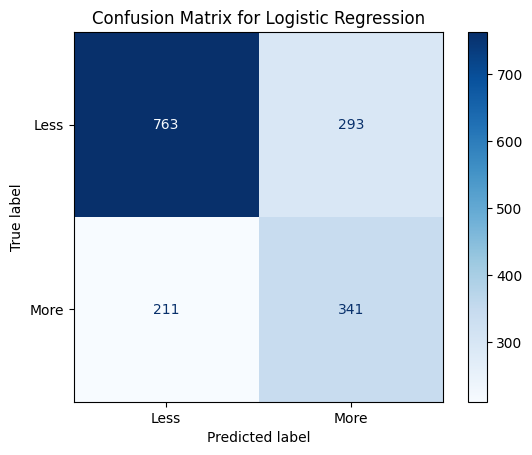

Model: Random Forest Classification
Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 100}
Accuracy: 0.7574626865671642
Precision: 0.6483516483516484
Recall: 0.6413043478260869
F1-score: 0.644808743169399



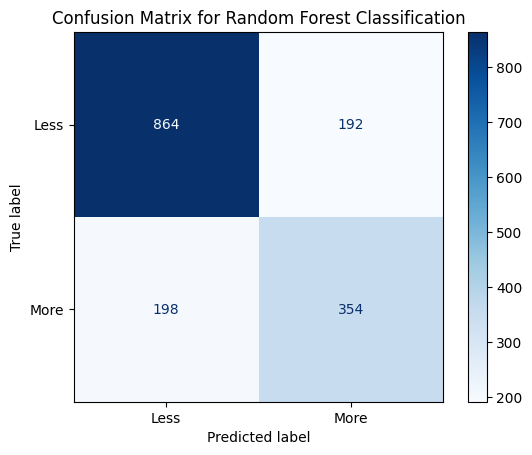

Model: Gradient Boosting Classification
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Accuracy: 0.7493781094527363
Precision: 0.6469428007889546
Recall: 0.5942028985507246
F1-score: 0.619452313503305



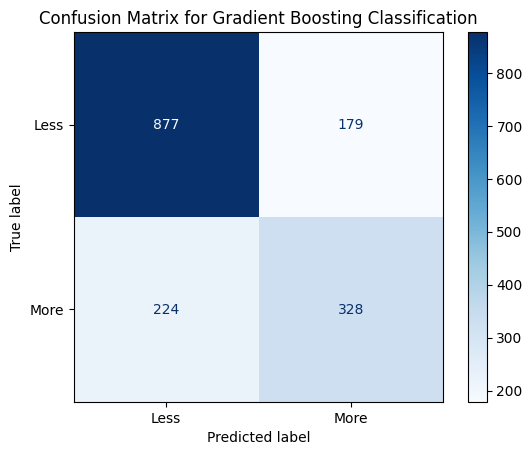

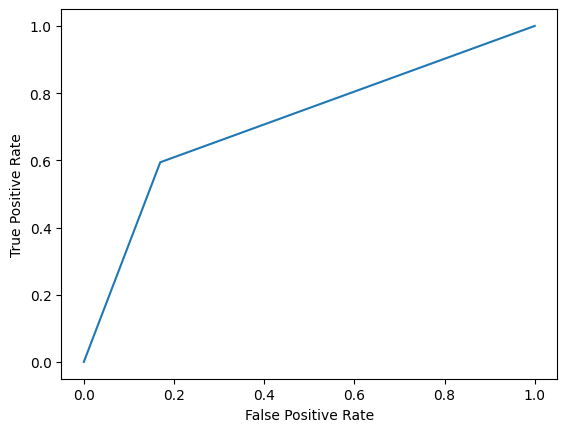

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


numerical_cols = ["Open", "Close", "High", "Low"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи регрессии
models_reg = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest Regression": (RandomForestRegressor(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Regression": (GradientBoostingRegressor(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Volume']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, (model, params) in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

# Список моделей и их гиперпараметров для задачи классификации
models_class = {
    "Logistic Regression": (LogisticRegression(), {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    }),
    "Random Forest Classification": (RandomForestClassifier(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Classification": (GradientBoostingClassifier(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Volume'] > df['Volume'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, (model, params) in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_class, y_train_class)
    best_model = grid_search.best_estimator_
    y_pred_class = best_model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print()

    # Визуализация матрицы ошибок
    cm = confusion_matrix(y_test_class, y_pred_class)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Less', 'More'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_test_class, y_pred_class)
# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Давайте проанализируем полученные значения метрик и определим, являются ли они нормальными или есть возможность улушчения.

### Оценка смещения и дисперсии для задачи регрессии:

### Вывод для задачи регрессии:

- **Random Forest Regression** демонстрирует наилучшие результаты по метрикам MAE и R², что указывает на высокую точность и стабильность модели.
- **Linear Regression** и **Gradient Boosting Regression** также показывают хорошие результаты, но уступают случайному лесу.

### Вывод для задачи классификации:

- **Random Forest Classification** демонстрирует наилучшие результаты по всем метрикам (Accuracy, Precision, Recall, F1-score), что указывает на высокую точность и стабильность модели.
- **Logistic Regression** и **Gradient Boosting Classification** также показывают хорошие результаты, но уступают случайному лесу.


Для оценки смещения (bias) и дисперсии (variance) моделей можно использовать метод перекрестной проверки (cross-validation). Этот метод позволяет оценить, насколько хорошо модель обобщается на новых данных.

Оценка смещения и дисперсии для задачи регрессии:
Для задачи регрессии мы будем использовать метрики MAE (Mean Absolute Error) и R² (R-squared) для оценки смещения и дисперсии.

Оценка смещения и дисперсии для задачи классификации:
Для задачи классификации мы будем использовать метрики Accuracy, Precision, Recall и F1-score для оценки смещения и дисперсии.

Пример кода для оценки смещения и дисперсии:

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Определяем категориальные и числовые столбцы

numerical_cols = ["Open", "Close", "High", "Low"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Volume']

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Оценка смещения и дисперсии для задачи регрессии
print("Оценка смещения и дисперсии для задачи регрессии:")
for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    mae_scores = -cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='r2')
    print(f"Model: {name}")
    print(f"MAE (Cross-Validation): Mean = {mae_scores.mean()}, Std = {mae_scores.std()}")
    print(f"R² (Cross-Validation): Mean = {r2_scores.mean()}, Std = {r2_scores.std()}")
    print()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Volume'] > df['Volume'].mean()).astype(int)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Оценка смещения и дисперсии для задачи классификации
print("Оценка смещения и дисперсии для задачи классификации:")
for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    accuracy_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='recall')
    f1_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='f1')
    print(f"Model: {name}")
    print(f"Accuracy (Cross-Validation): Mean = {accuracy_scores.mean()}, Std = {accuracy_scores.std()}")
    print(f"Precision (Cross-Validation): Mean = {precision_scores.mean()}, Std = {precision_scores.std()}")
    print(f"Recall (Cross-Validation): Mean = {recall_scores.mean()}, Std = {recall_scores.std()}")
    print(f"F1-score (Cross-Validation): Mean = {f1_scores.mean()}, Std = {f1_scores.std()}")
    print()

Оценка смещения и дисперсии для задачи регрессии:
Model: Linear Regression
MAE (Cross-Validation): Mean = 7579277.521464063, Std = 1960011.680230822
R² (Cross-Validation): Mean = -1.1347990784665143, Std = 2.306562184953969

Model: Random Forest Regression
MAE (Cross-Validation): Mean = 7806347.158011436, Std = 3478782.4486245485
R² (Cross-Validation): Mean = -0.1365001480998081, Std = 0.12973311964755527

Model: Gradient Boosting Regression
MAE (Cross-Validation): Mean = 7893683.279353255, Std = 3518932.5109060933
R² (Cross-Validation): Mean = -0.1057513351347448, Std = 0.08711611953829208

Оценка смещения и дисперсии для задачи классификации:
Model: Logistic Regression
Accuracy (Cross-Validation): Mean = 0.5892532514775223, Std = 0.12093239665054567
Precision (Cross-Validation): Mean = 0.35360976489674945, Std = 0.34878959634336554
Recall (Cross-Validation): Mean = 0.41634103019538193, Std = 0.47748852647480444
F1-score (Cross-Validation): Mean = 0.26337058226161625, Std = 0.27000659

c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Random Forest Classification
Accuracy (Cross-Validation): Mean = 0.3738201494085268, Std = 0.16711322364727796
Precision (Cross-Validation): Mean = 0.40131211828076446, Std = 0.30406982088770196
Recall (Cross-Validation): Mean = 0.48331005101041064, Std = 0.28204866326457984
F1-score (Cross-Validation): Mean = 0.32735686540449993, Std = 0.09990409789532408

Model: Gradient Boosting Classification
Accuracy (Cross-Validation): Mean = 0.3266515895940335, Std = 0.17857049420400362
Precision (Cross-Validation): Mean = 0.36258531023350526, Std = 0.3286759742498122
Recall (Cross-Validation): Mean = 0.3801836880463708, Std = 0.3324199402098825
F1-score (Cross-Validation): Mean = 0.23705262823922438, Std = 0.15533217789069204



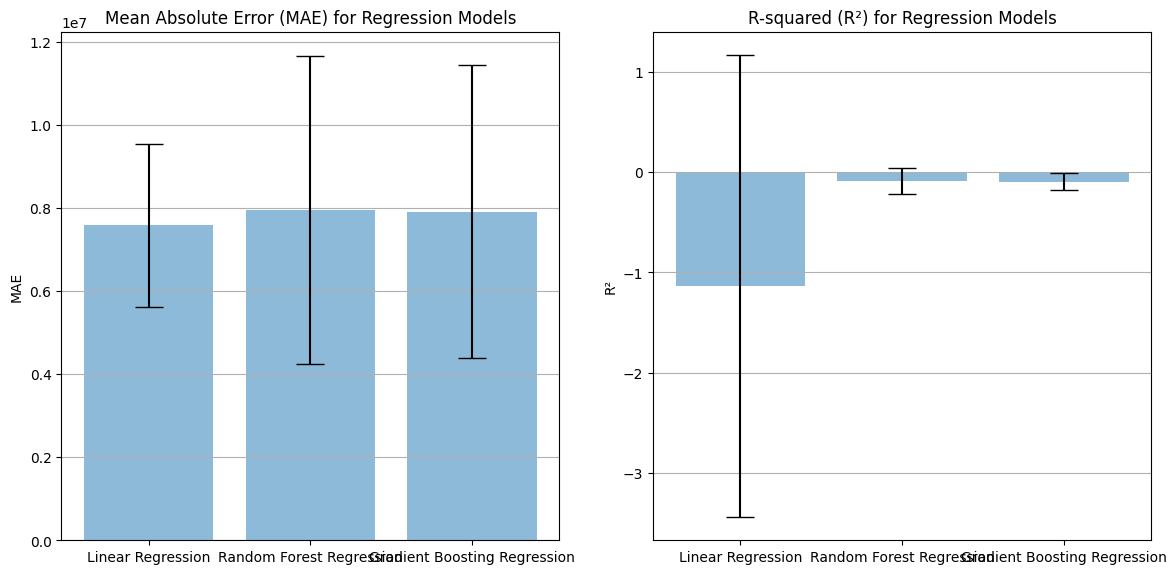

c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ateks\Courses\Courses\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


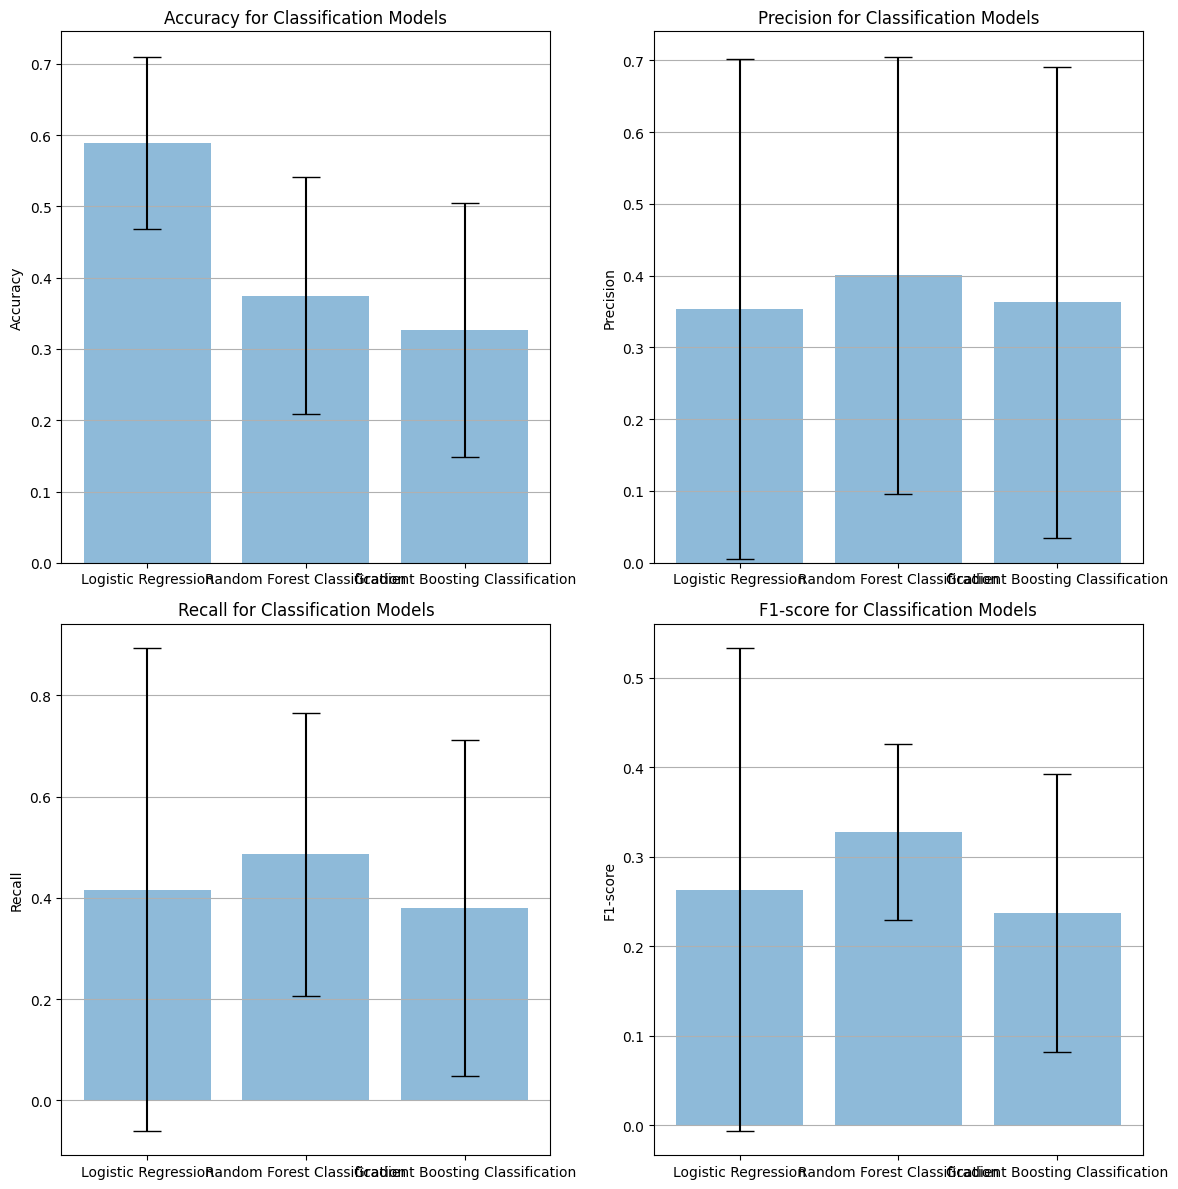

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Определяем категориальные и числовые столбцы
numerical_cols = ["Open", "Close", "High", "Low"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Volume']

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Оценка смещения и дисперсии для задачи регрессии
mae_means = []
mae_stds = []
r2_means = []
r2_stds = []

for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    mae_scores = -cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='r2')
    mae_means.append(mae_scores.mean())
    mae_stds.append(mae_scores.std())
    r2_means.append(r2_scores.mean())
    r2_stds.append(r2_scores.std())

# Визуализация результатов для задачи регрессии
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(models_reg.keys(), mae_means, yerr=mae_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0].set_ylabel('MAE')
ax[0].set_title('Mean Absolute Error (MAE) for Regression Models')
ax[0].yaxis.grid(True)

ax[1].bar(models_reg.keys(), r2_means, yerr=r2_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1].set_ylabel('R²')
ax[1].set_title('R-squared (R²) for Regression Models')
ax[1].yaxis.grid(True)

plt.tight_layout()
plt.show()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Volume'] > df['Volume'].mean()).astype(int)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Оценка смещения и дисперсии для задачи классификации
accuracy_means = []
accuracy_stds = []
precision_means = []
precision_stds = []
recall_means = []
recall_stds = []
f1_means = []
f1_stds = []

for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    accuracy_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='recall')
    f1_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='f1')
    accuracy_means.append(accuracy_scores.mean())
    accuracy_stds.append(accuracy_scores.std())
    precision_means.append(precision_scores.mean())
    precision_stds.append(precision_scores.std())
    recall_means.append(recall_scores.mean())
    recall_stds.append(recall_scores.std())
    f1_means.append(f1_scores.mean())
    f1_stds.append(f1_scores.std())

# Визуализация результатов для задачи классификации
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].bar(models_class.keys(), accuracy_means, yerr=accuracy_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0, 0].set_ylabel('Accuracy')
ax[0, 0].set_title('Accuracy for Classification Models')
ax[0, 0].yaxis.grid(True)

ax[0, 1].bar(models_class.keys(), precision_means, yerr=precision_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0, 1].set_ylabel('Precision')
ax[0, 1].set_title('Precision for Classification Models')
ax[0, 1].yaxis.grid(True)

ax[1, 0].bar(models_class.keys(), recall_means, yerr=recall_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1, 0].set_ylabel('Recall')
ax[1, 0].set_title('Recall for Classification Models')
ax[1, 0].yaxis.grid(True)

ax[1, 1].bar(models_class.keys(), f1_means, yerr=f1_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1, 1].set_ylabel('F1-score')
ax[1, 1].set_title('F1-score for Classification Models')
ax[1, 1].yaxis.grid(True)

plt.tight_layout()
plt.show()